<a href="https://colab.research.google.com/github/samsomsabu/CIA_ASSIGNMENT/blob/main/2348549_DAA_Assignment_CIA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

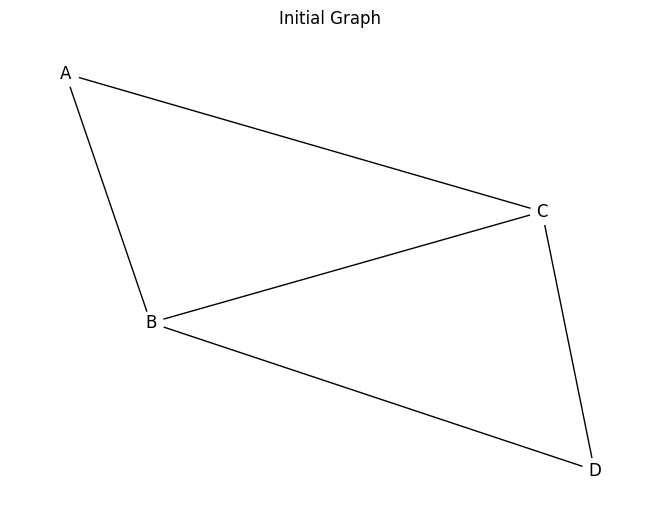

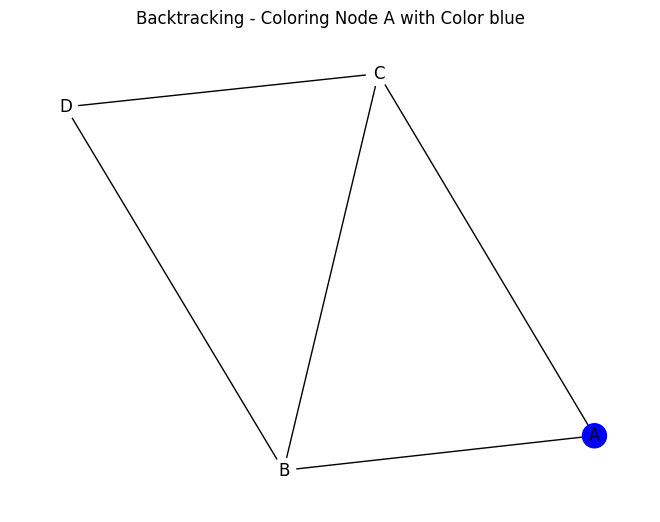

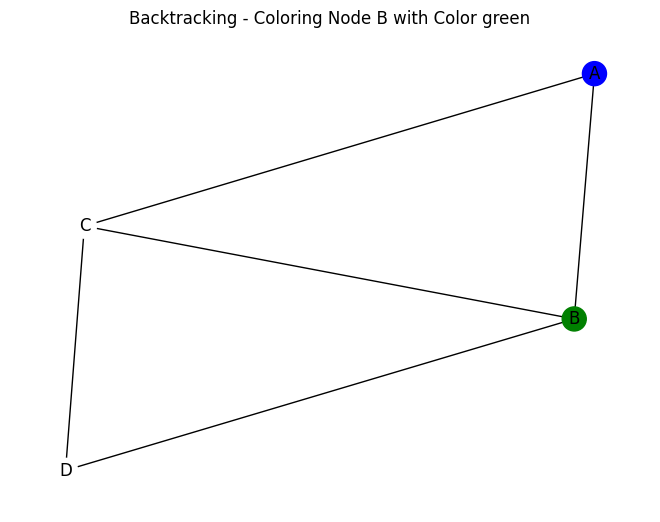

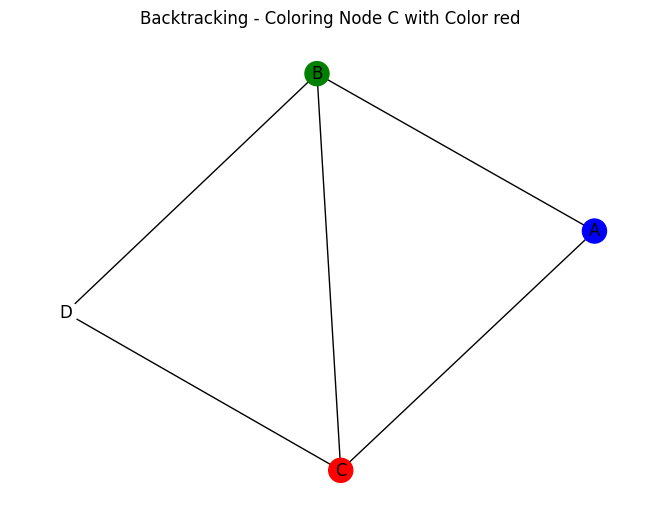

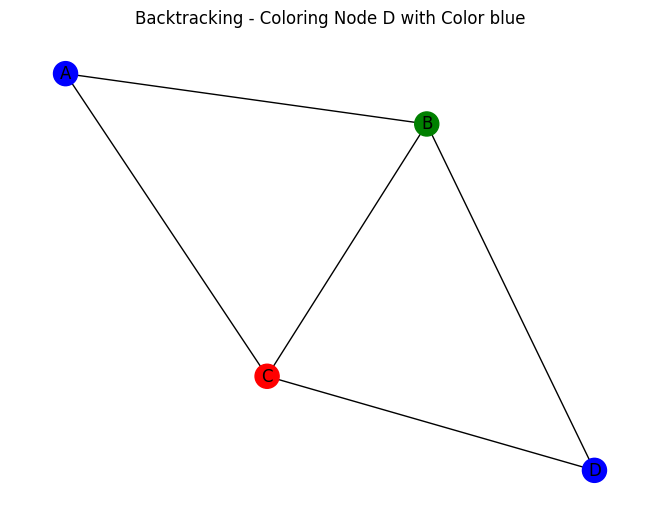

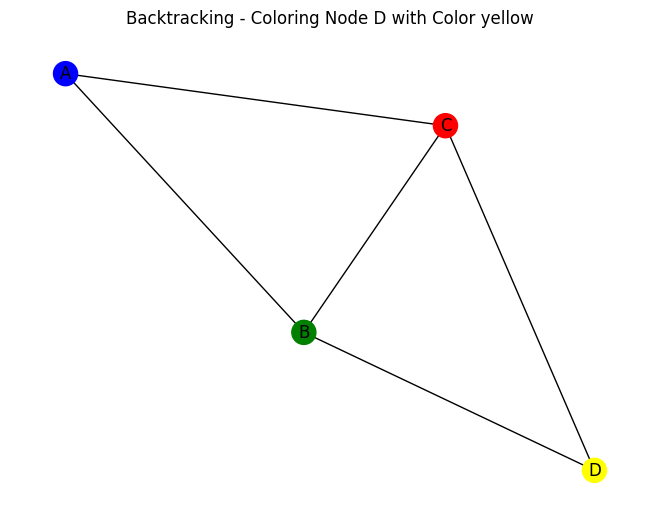

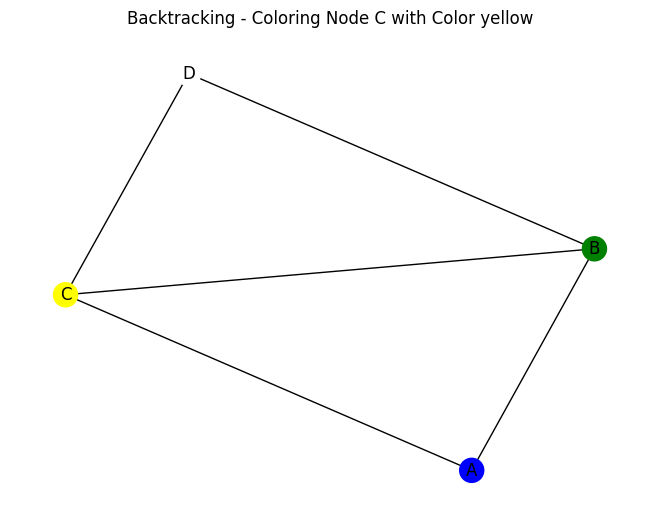

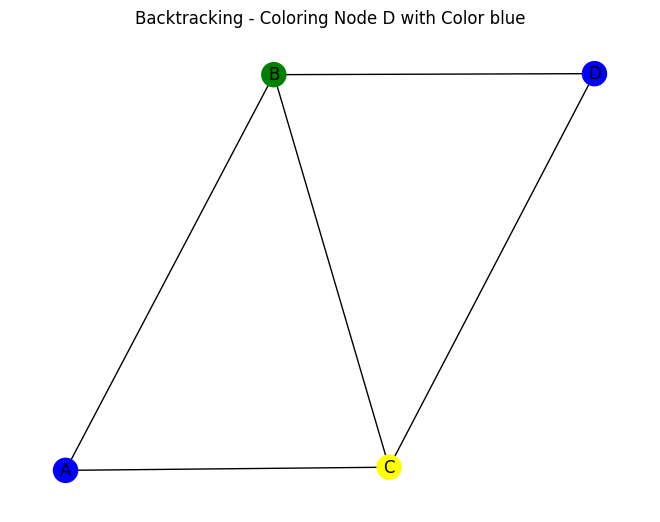

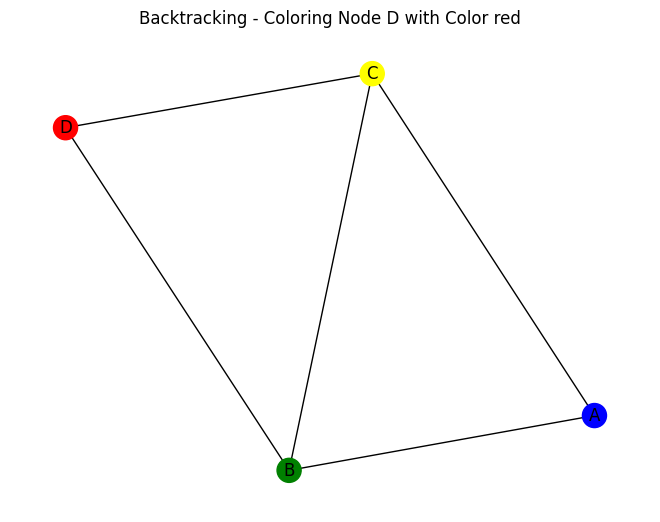

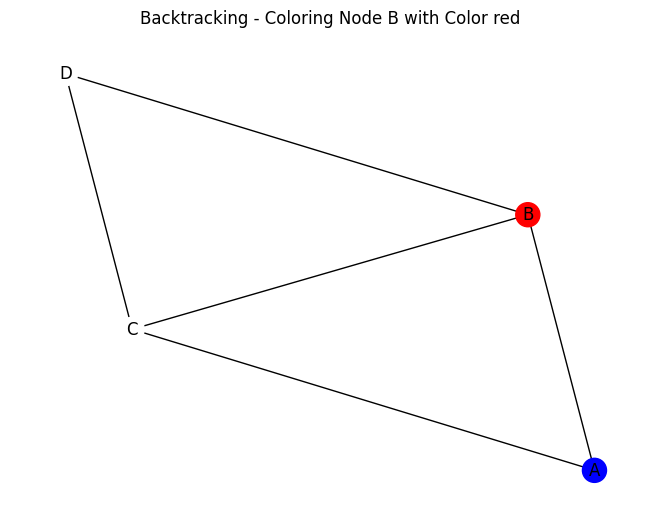

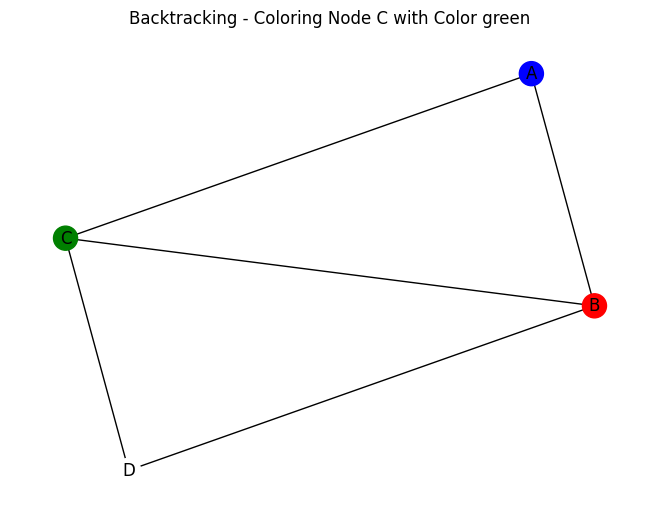

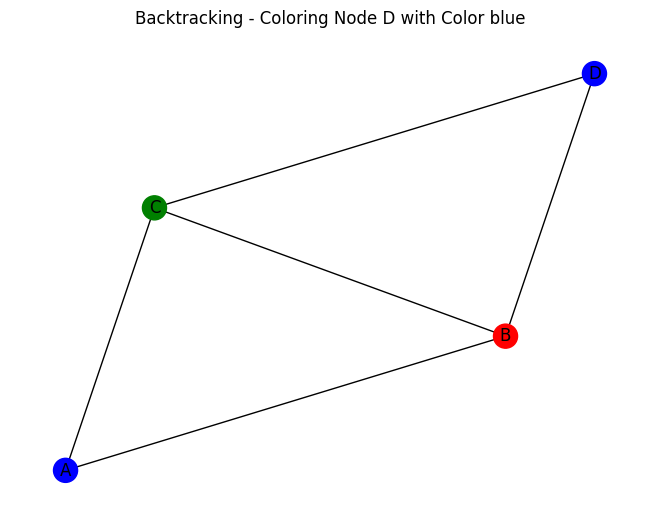

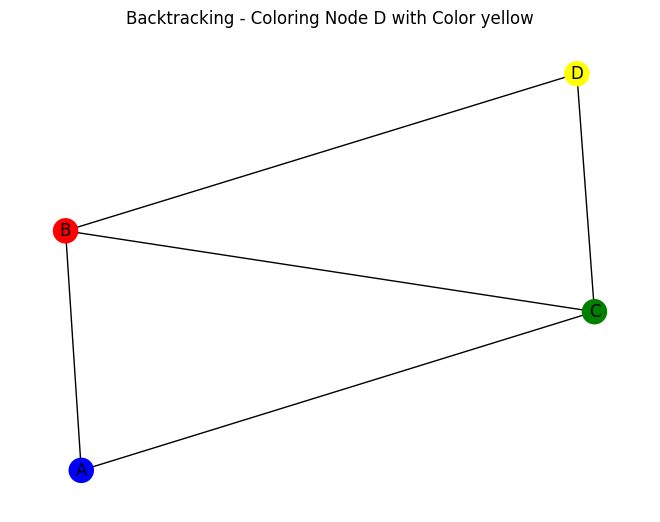

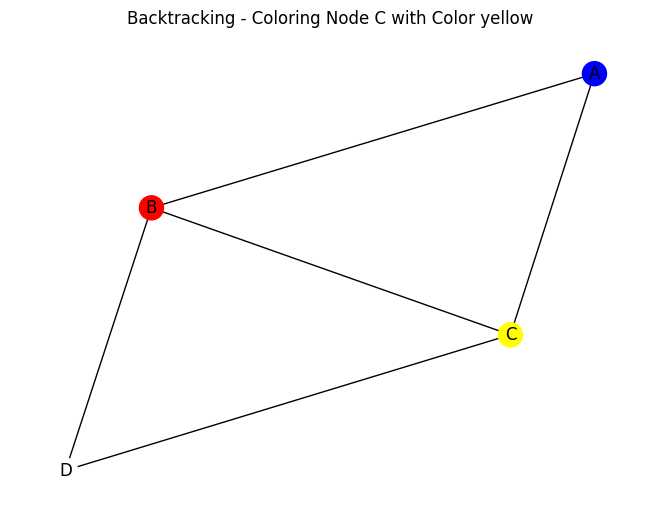

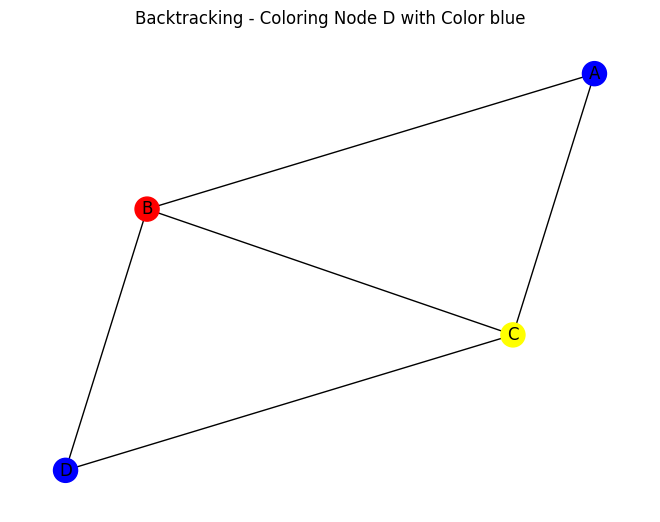

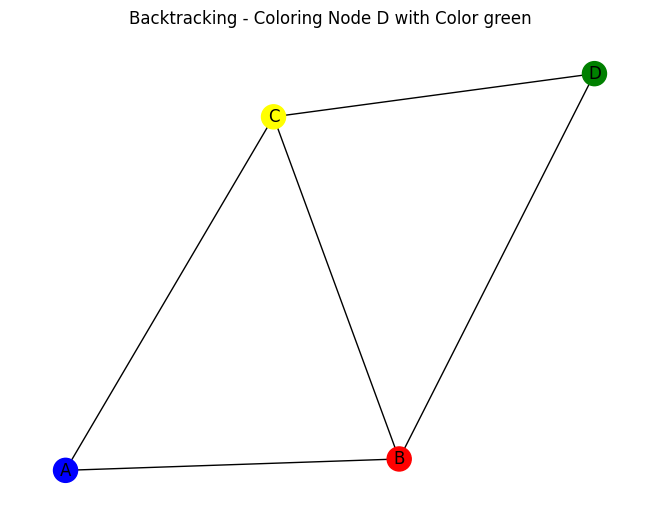

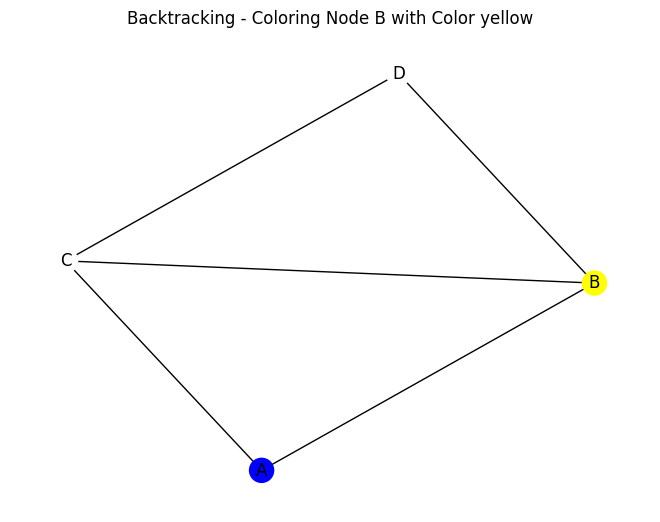

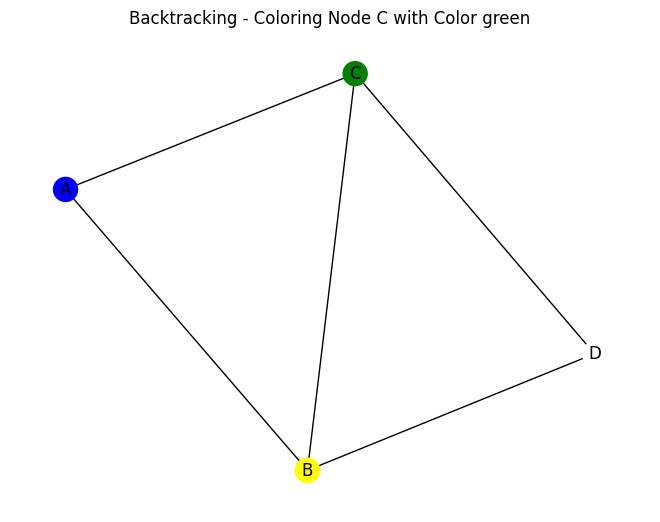

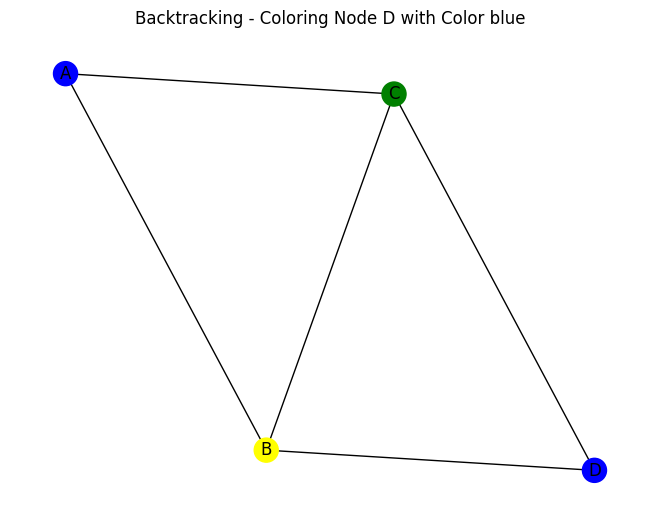

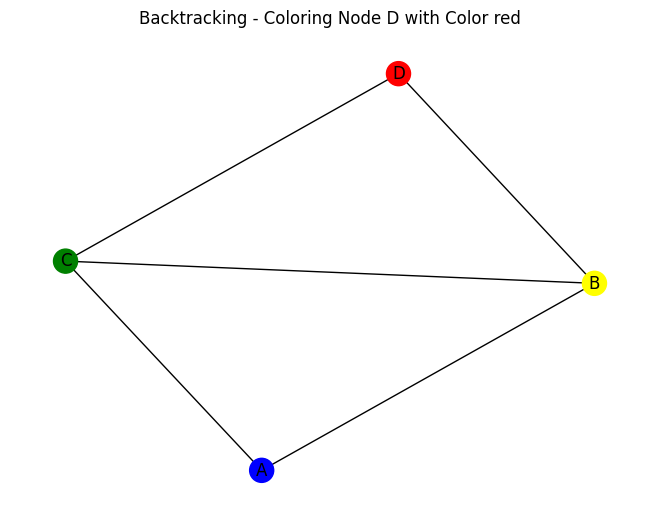

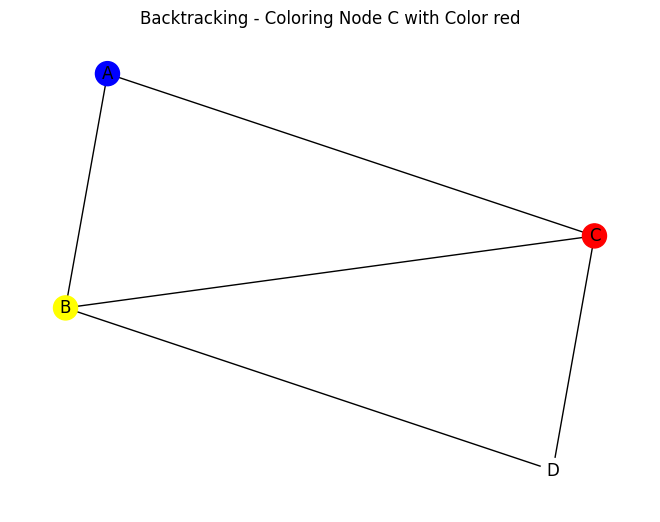

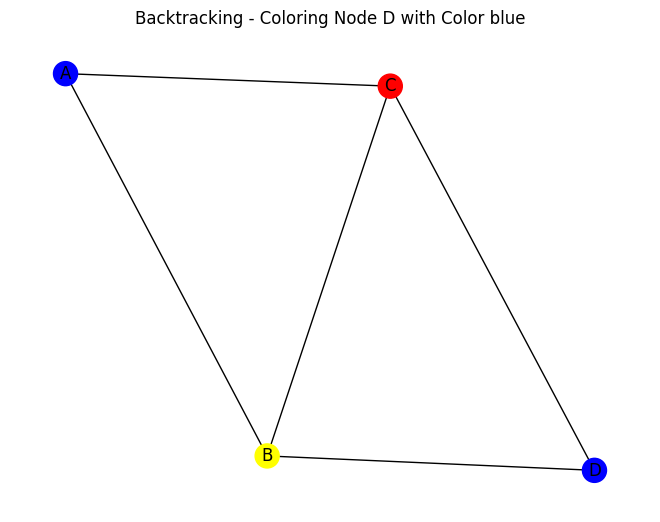

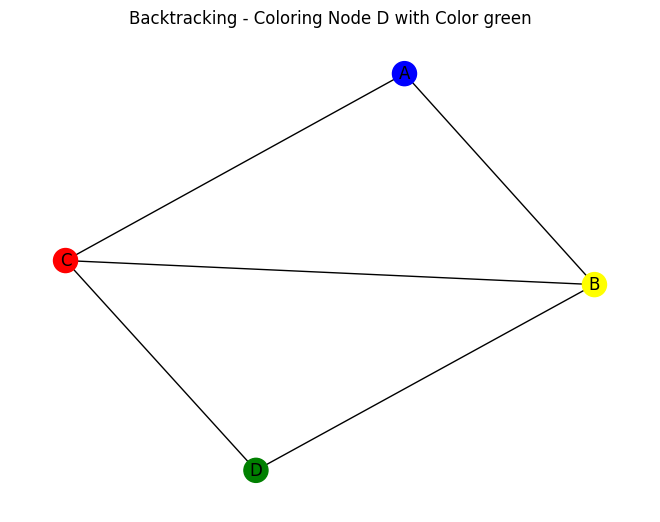

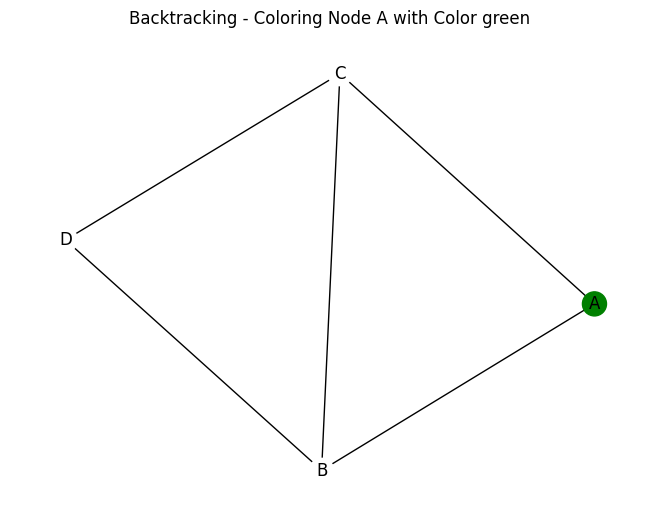

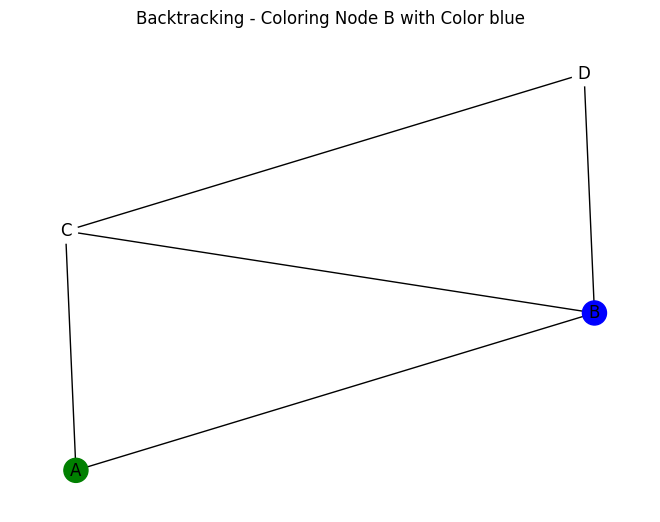

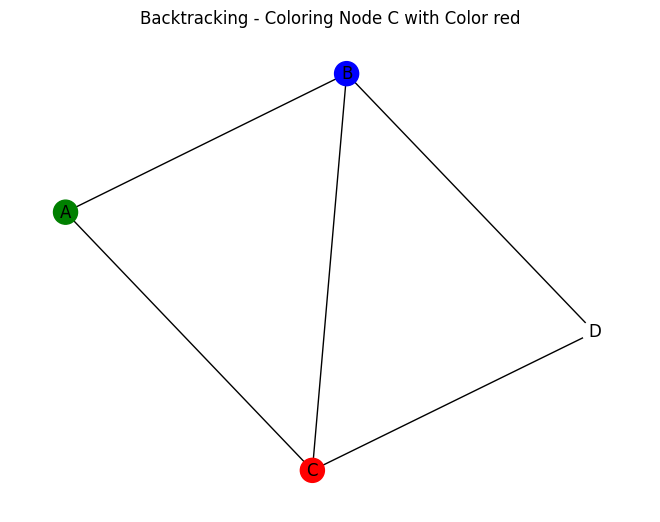

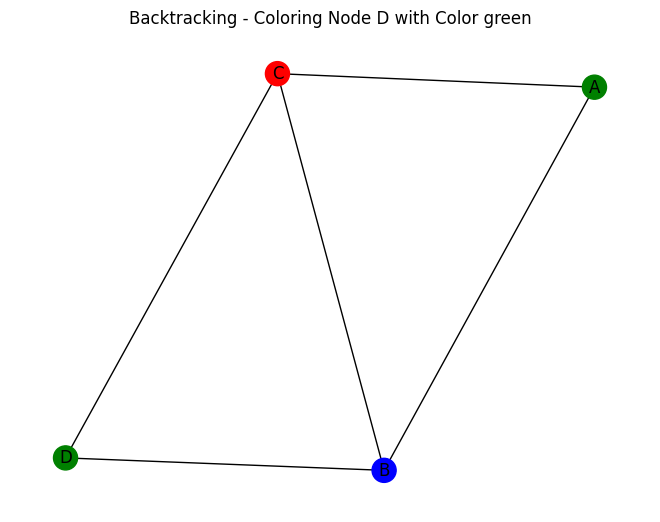

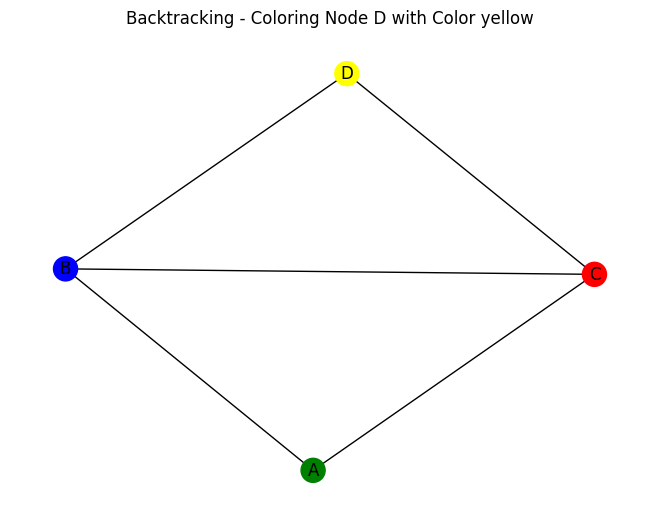

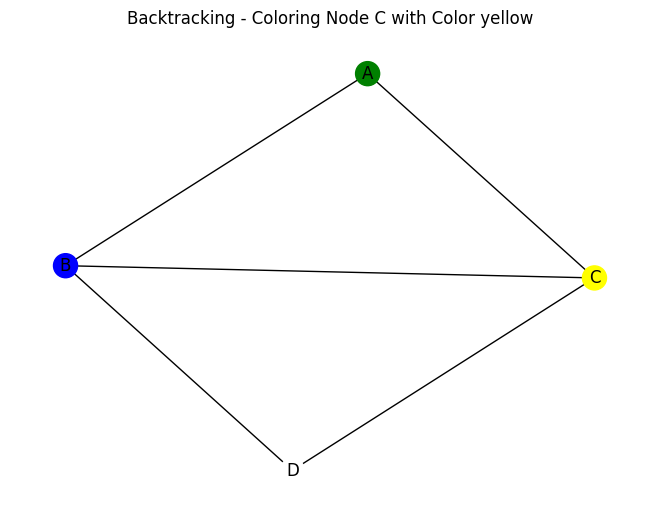

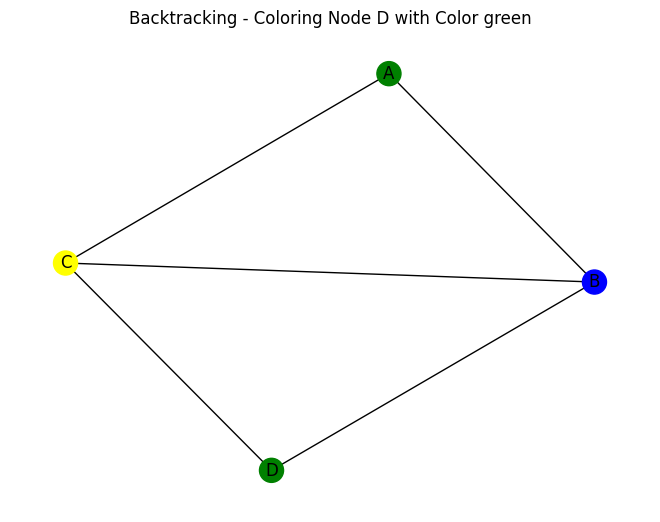

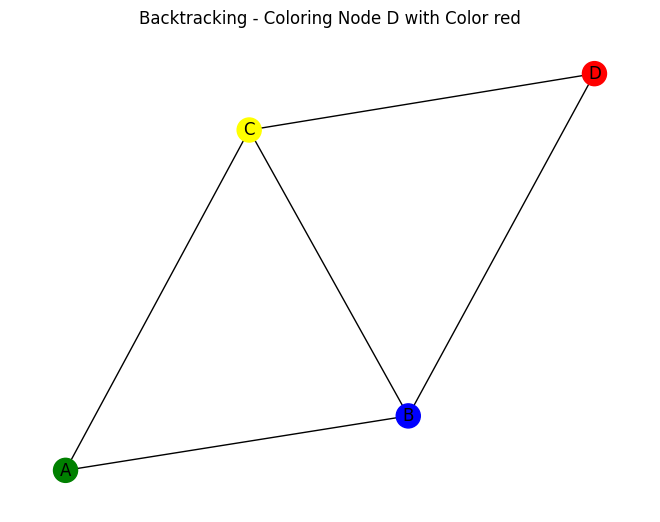

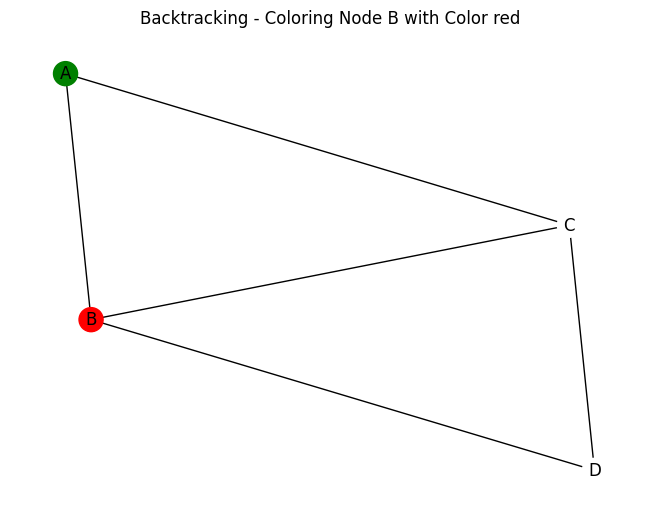

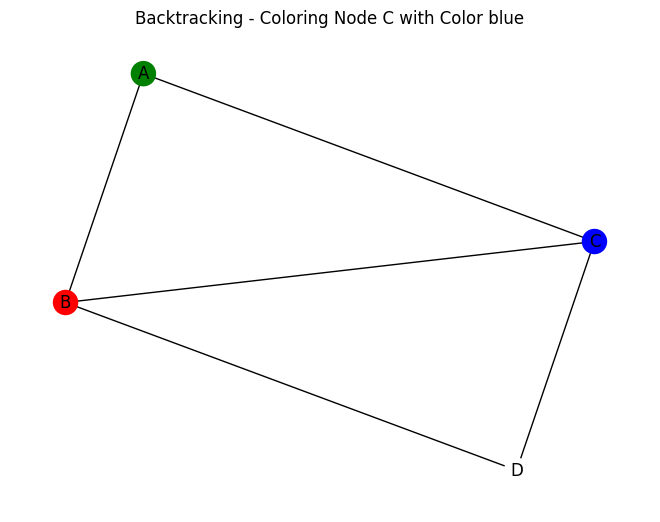

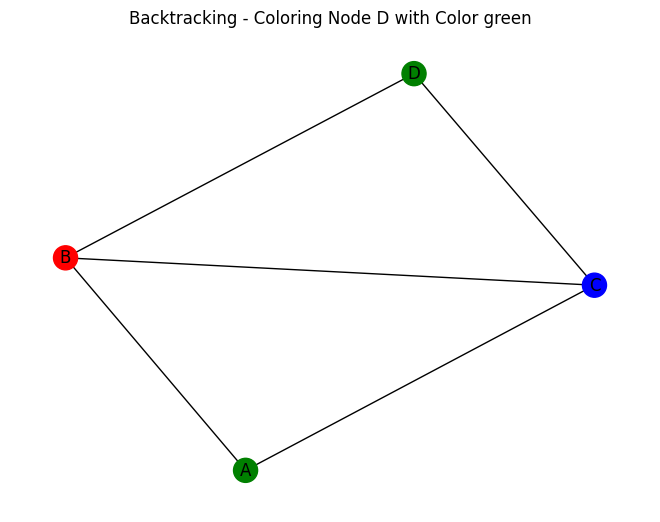

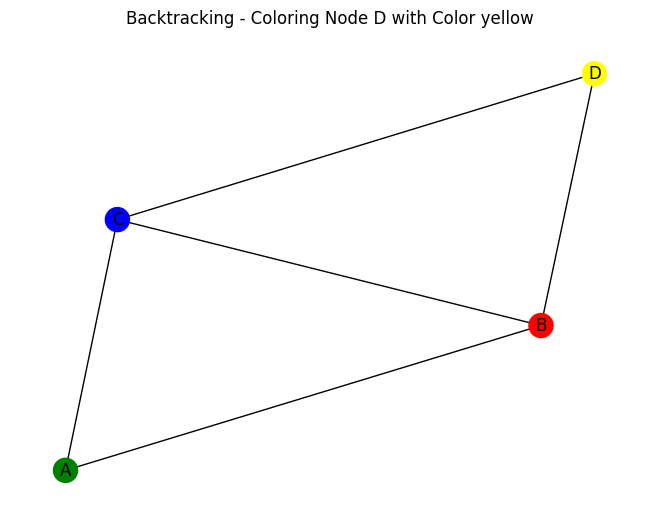

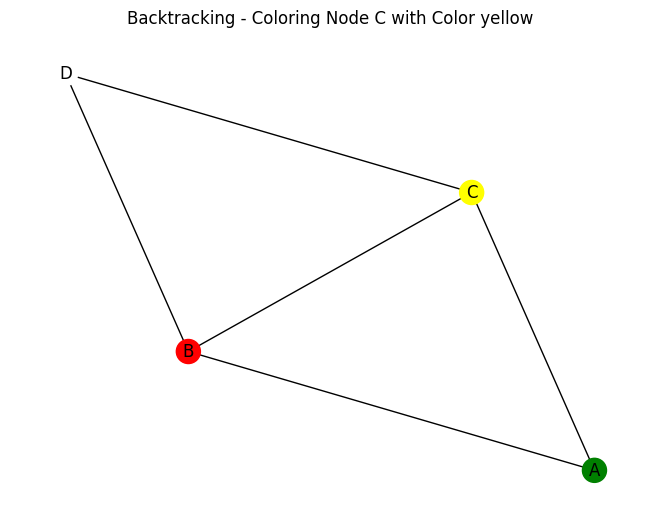

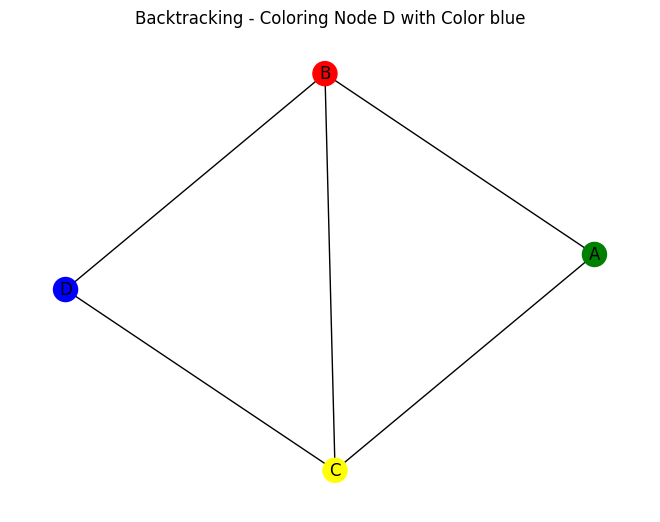

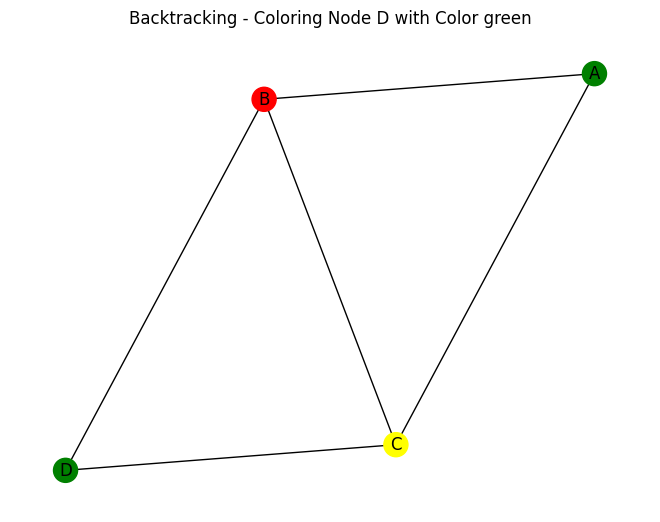

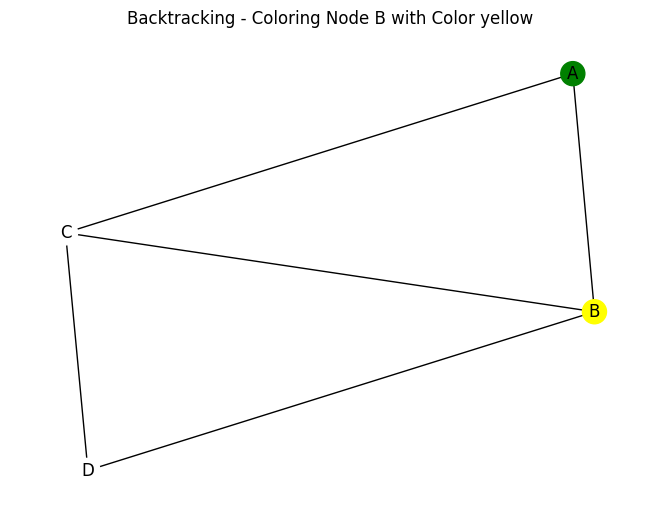

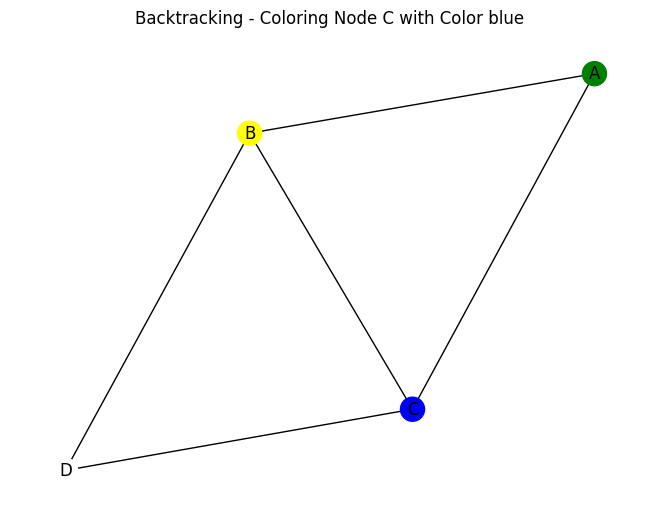

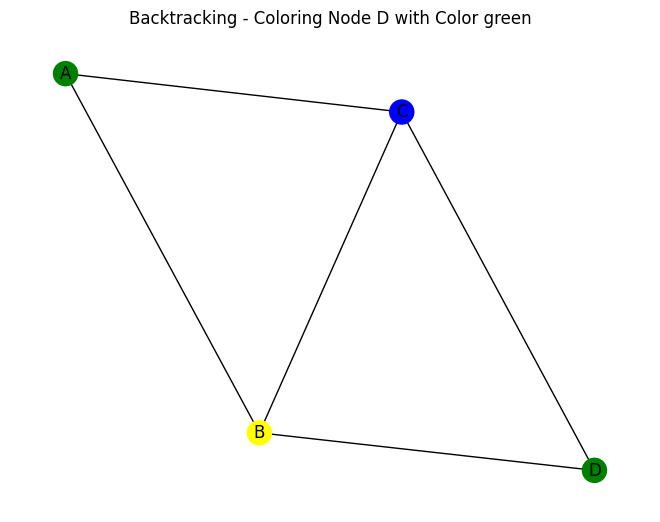

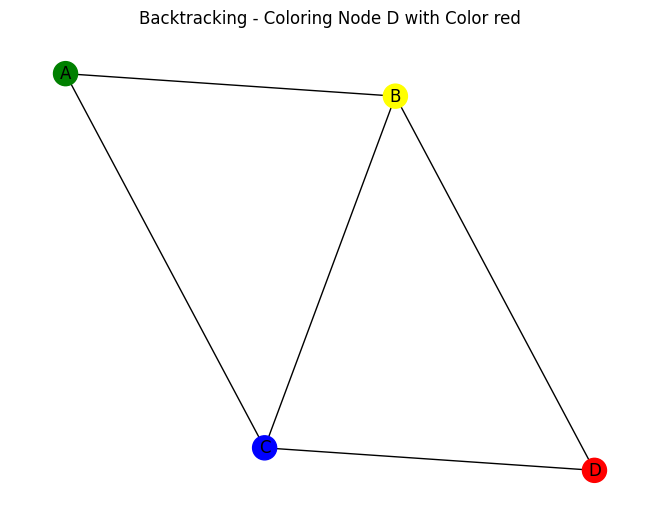

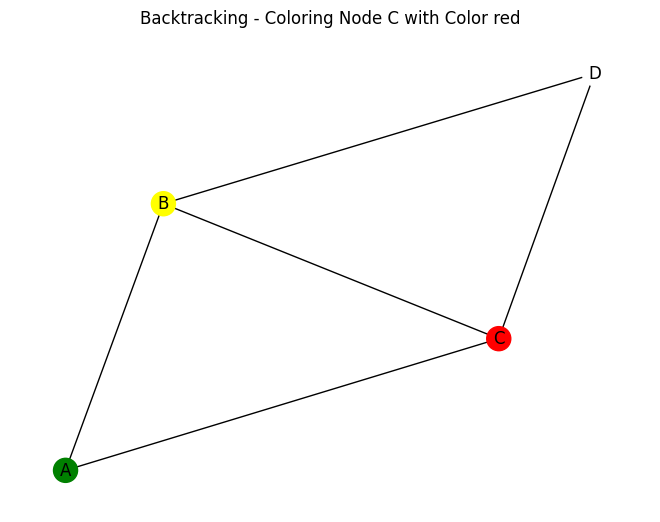

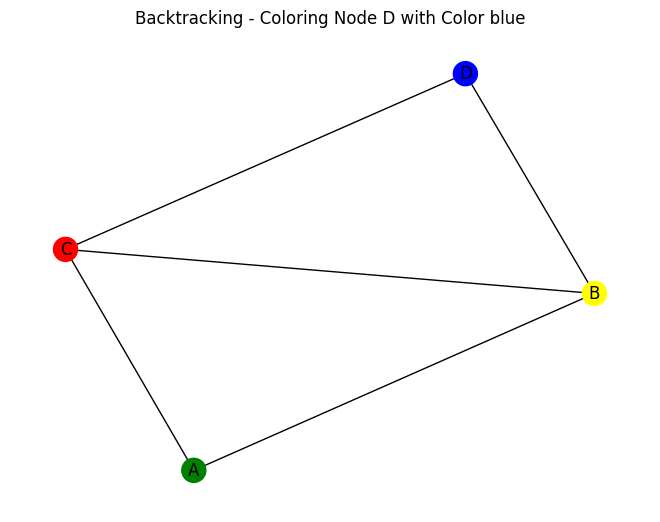

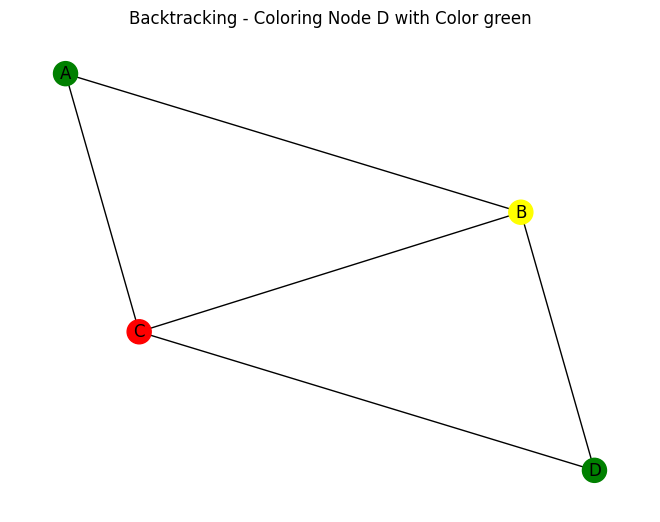

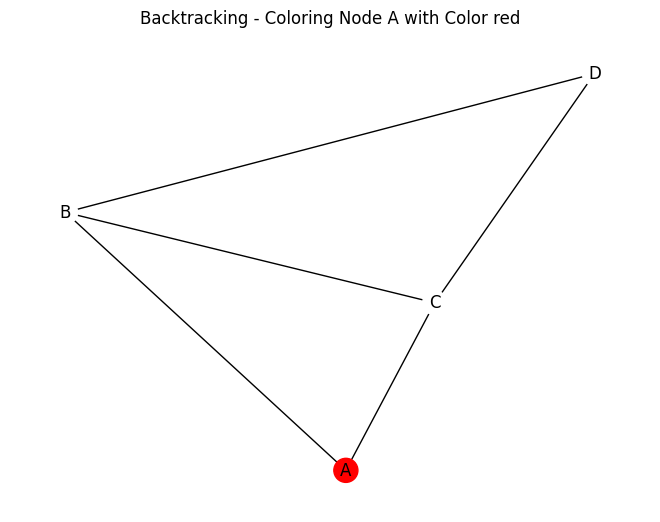

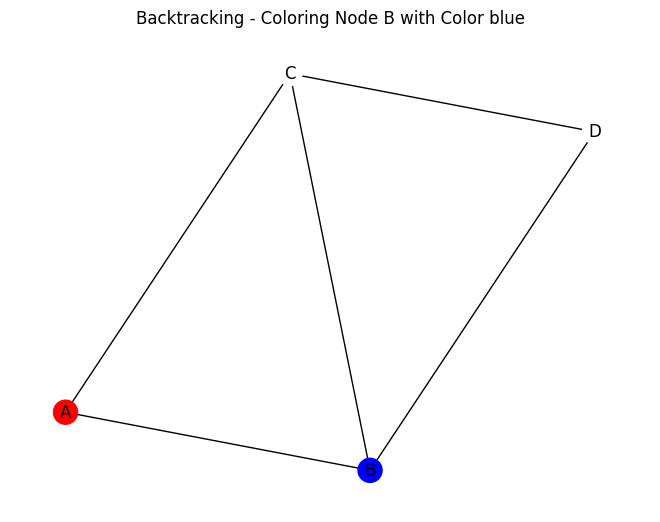

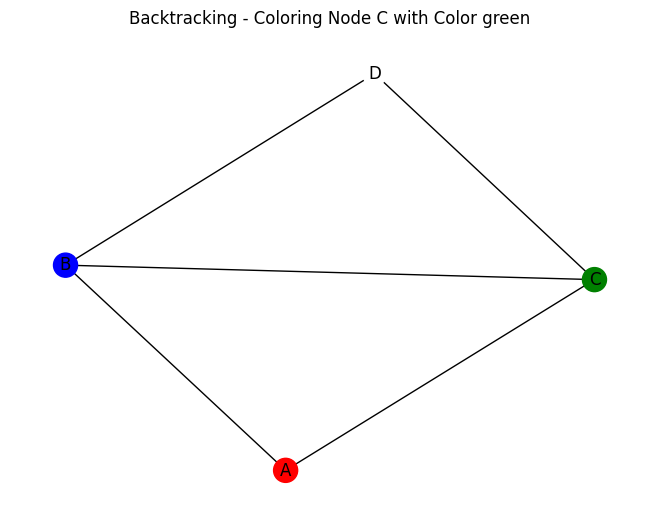

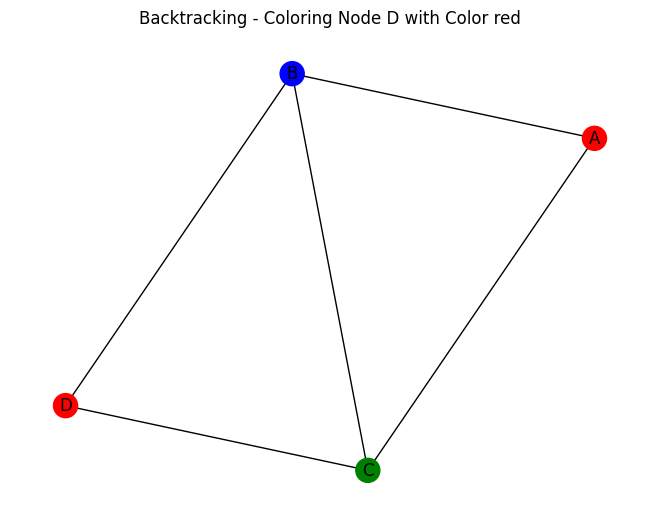

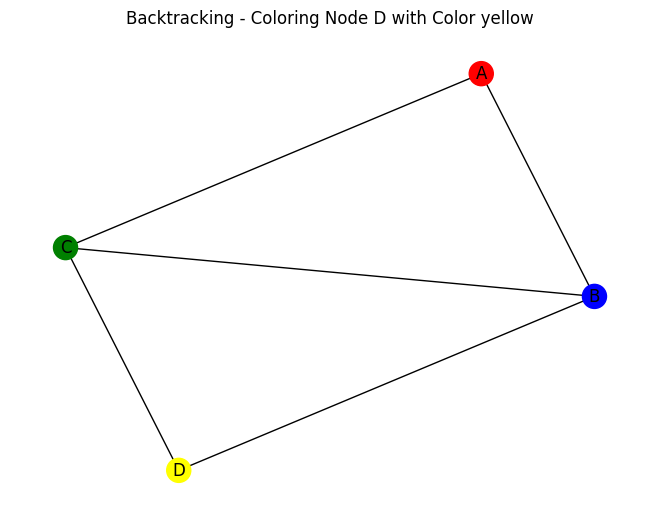

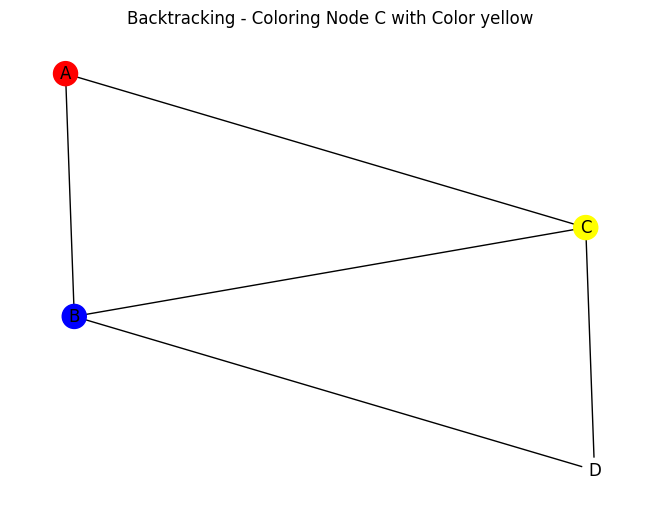

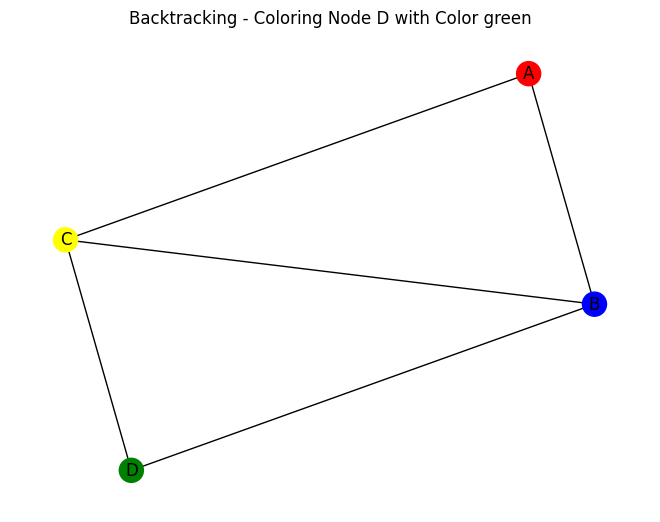

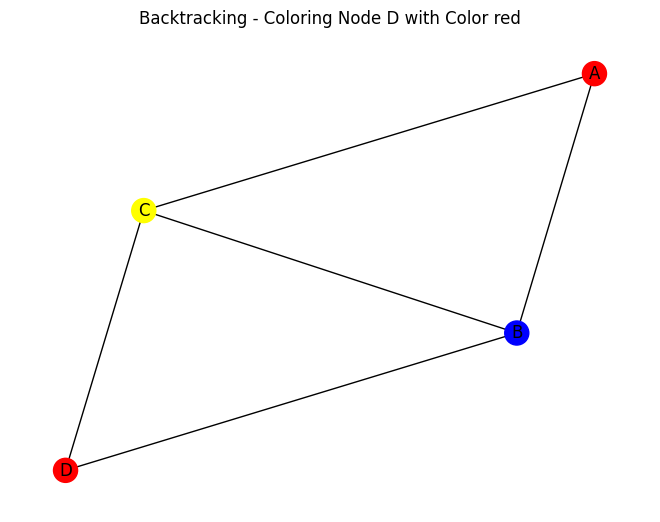

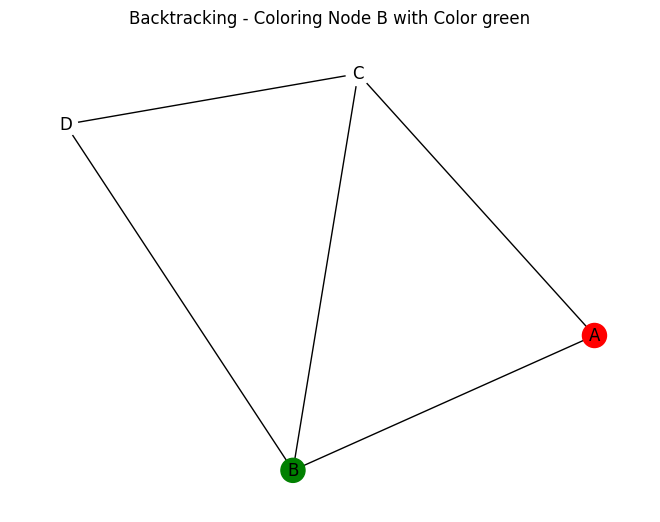

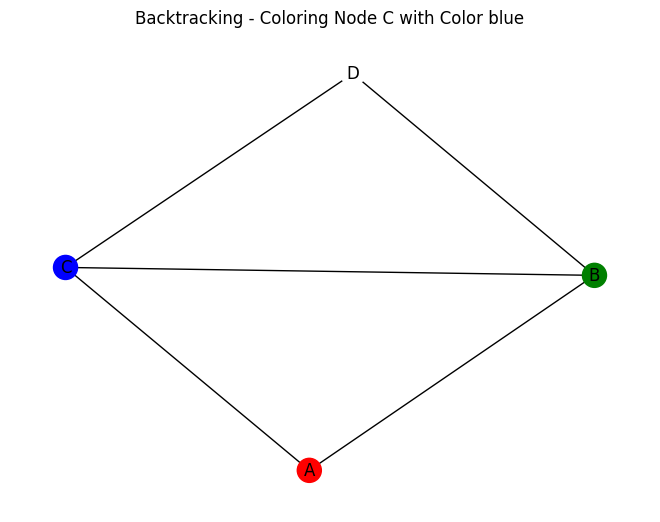

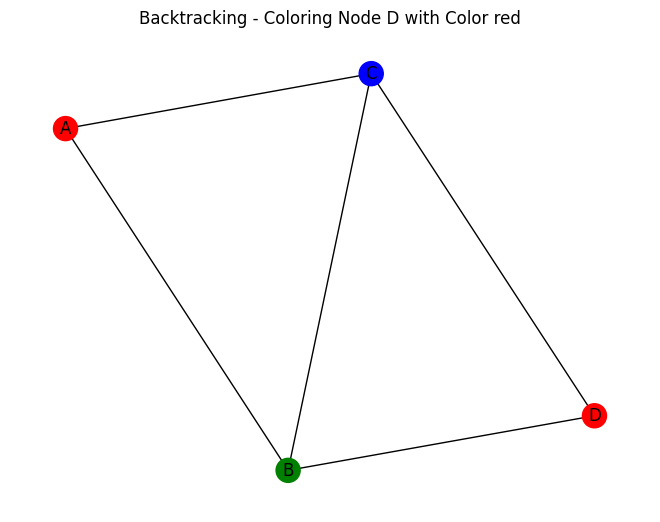

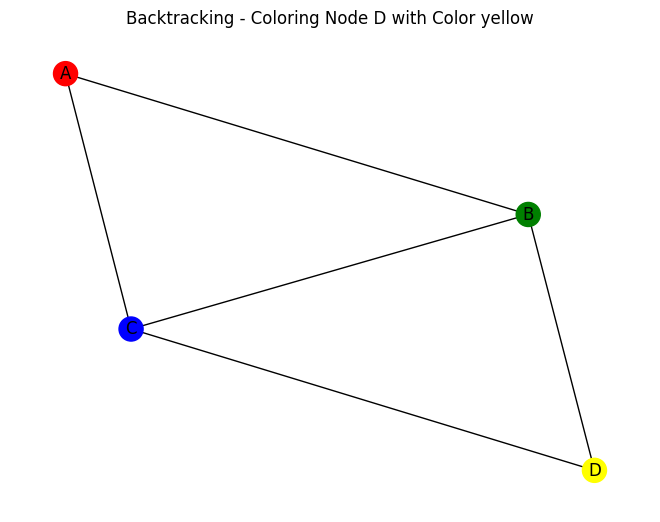

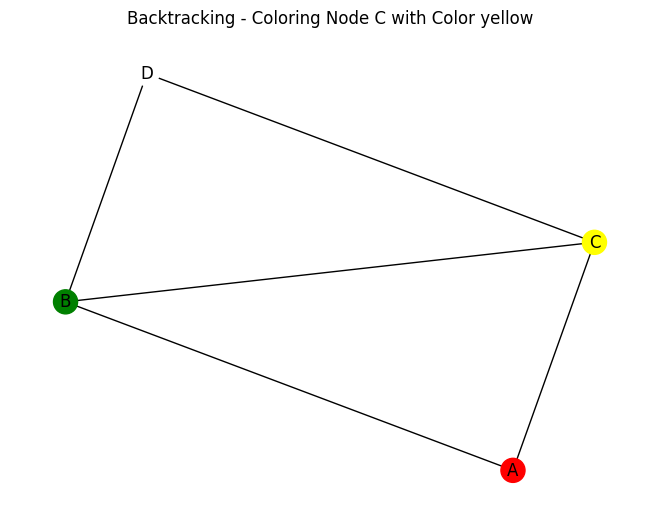

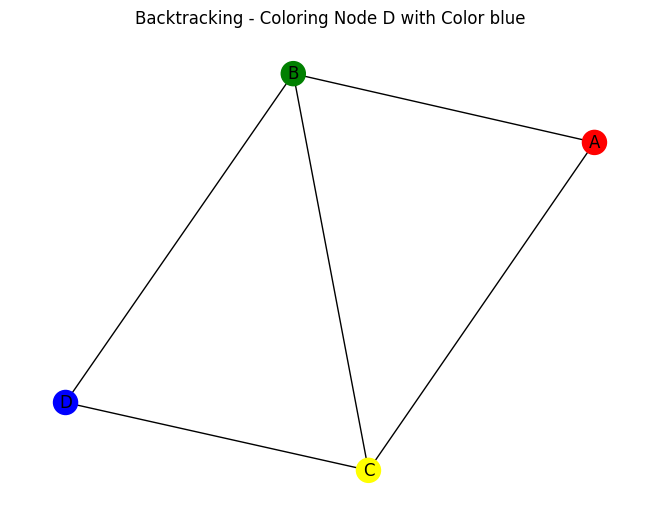

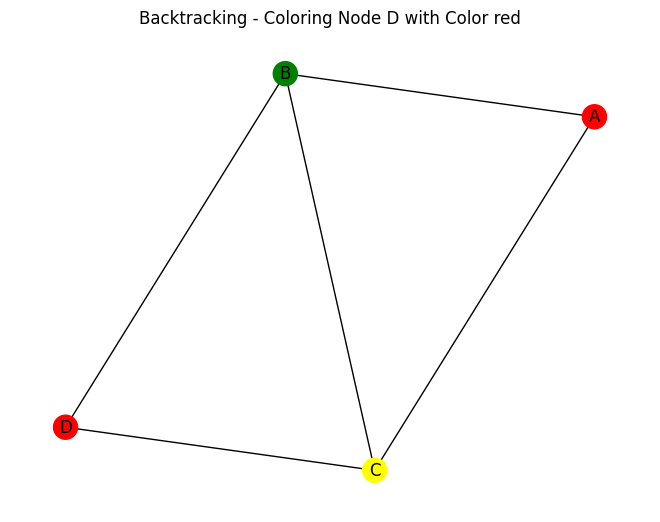

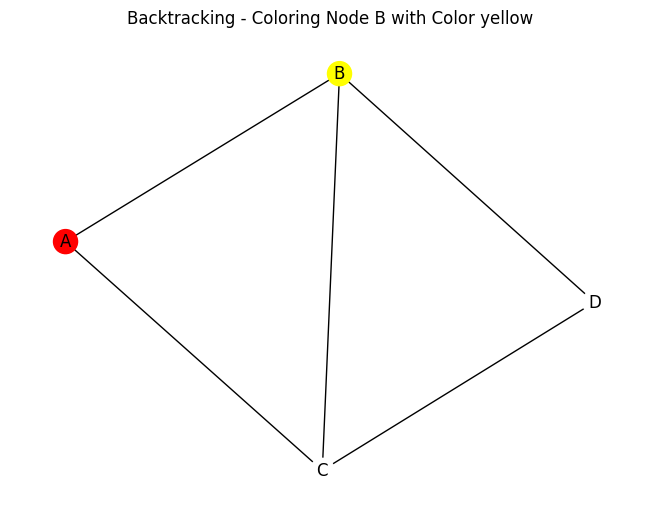

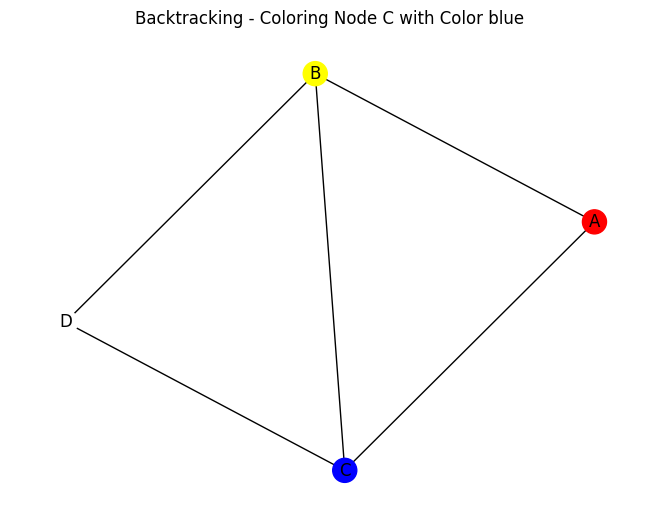

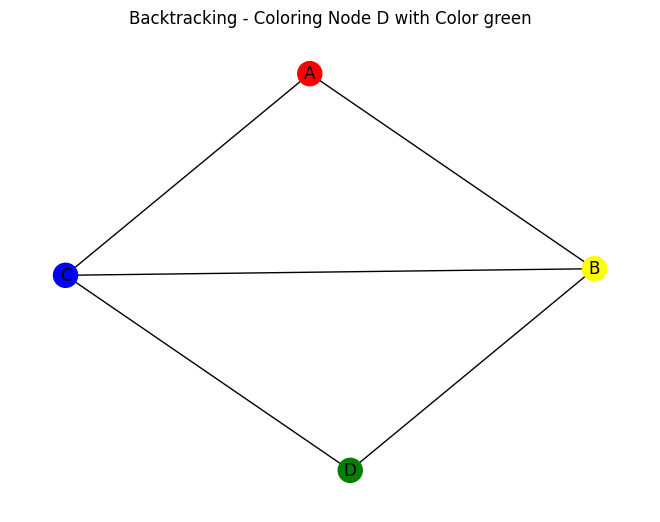

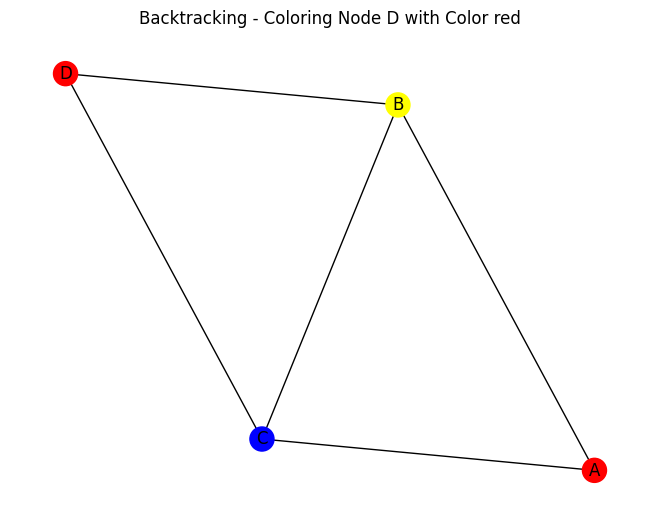

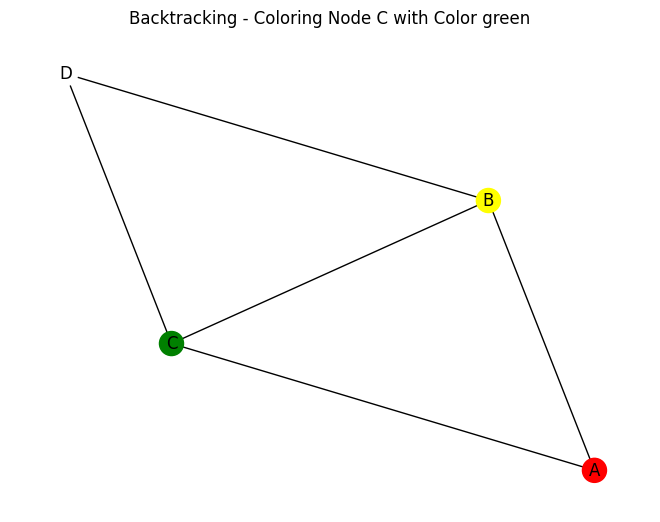

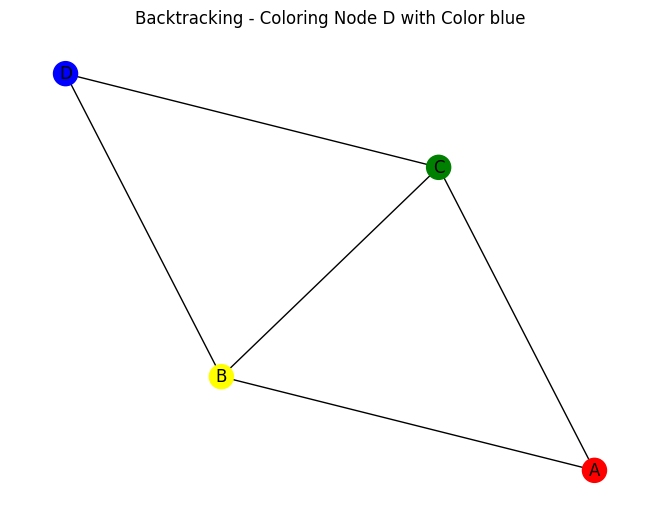

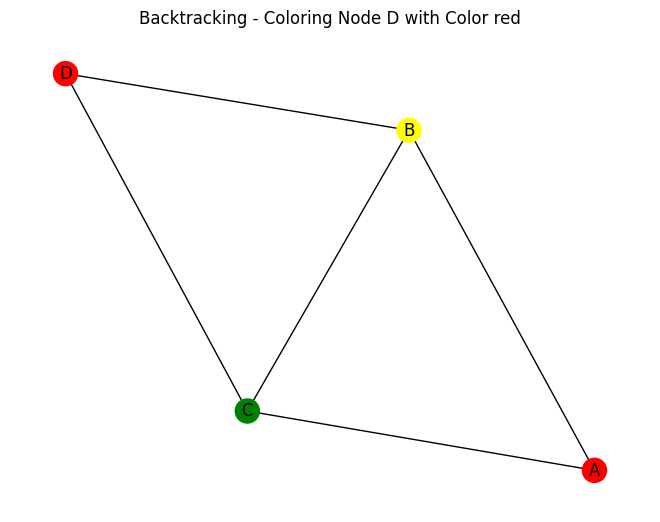

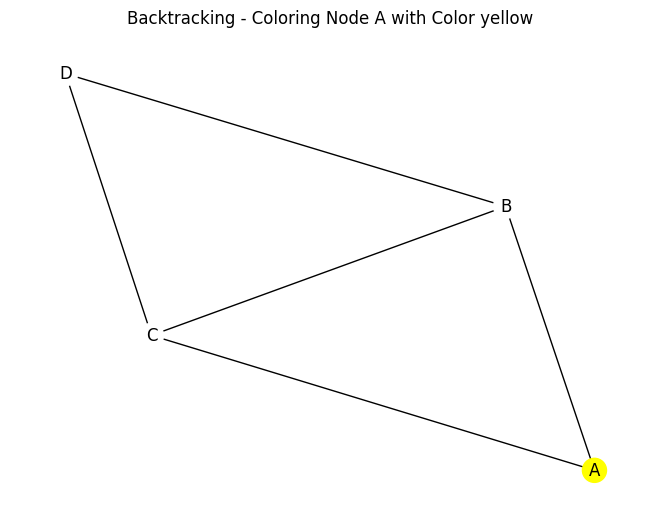

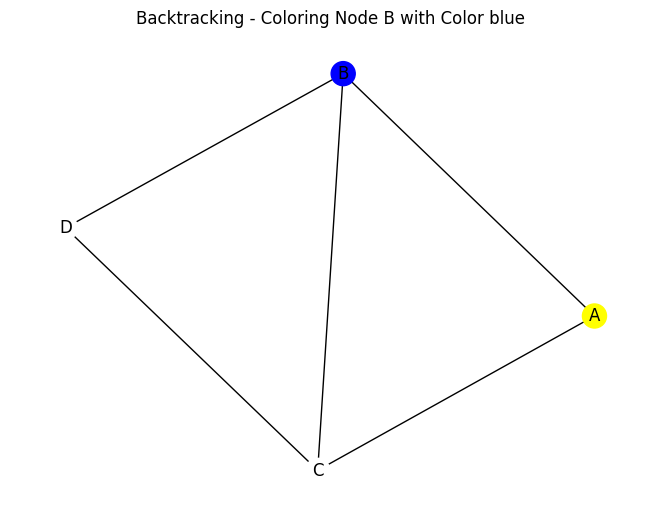

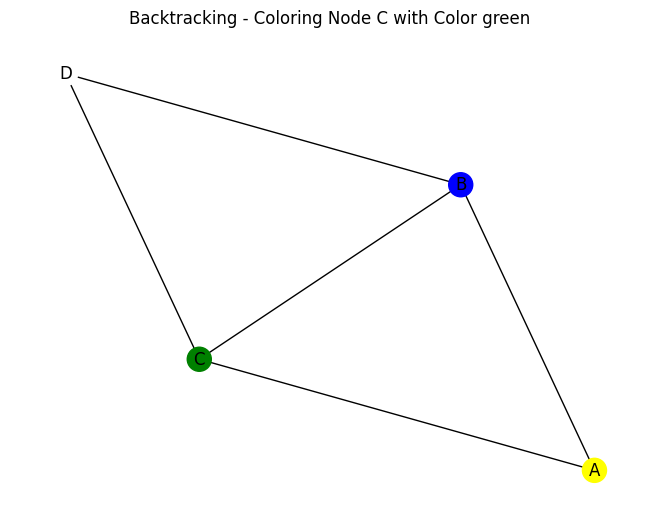

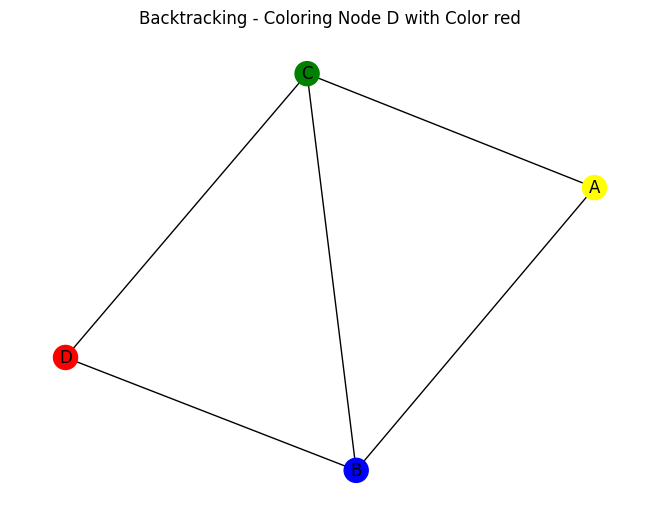

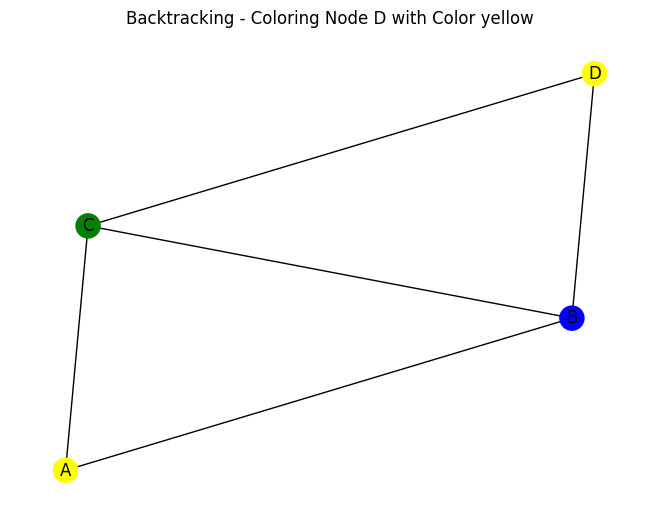

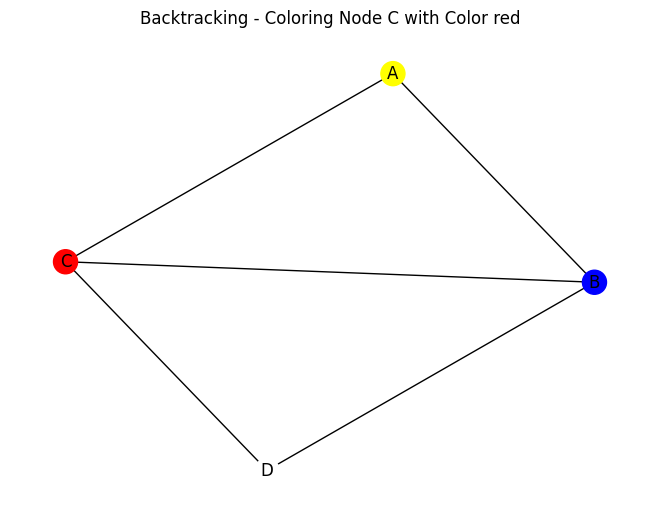

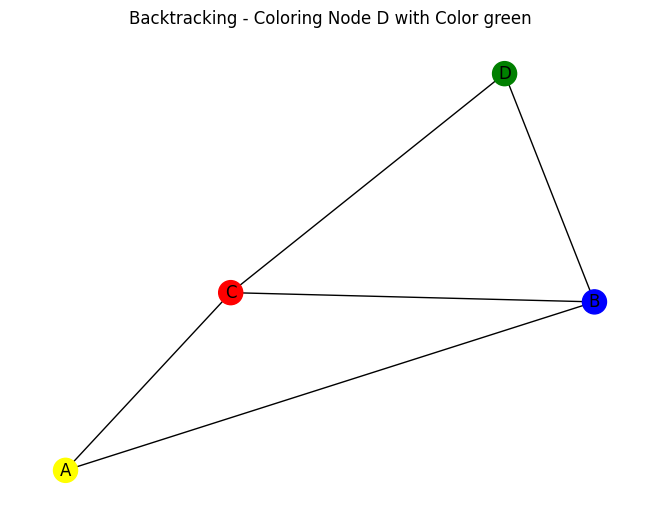

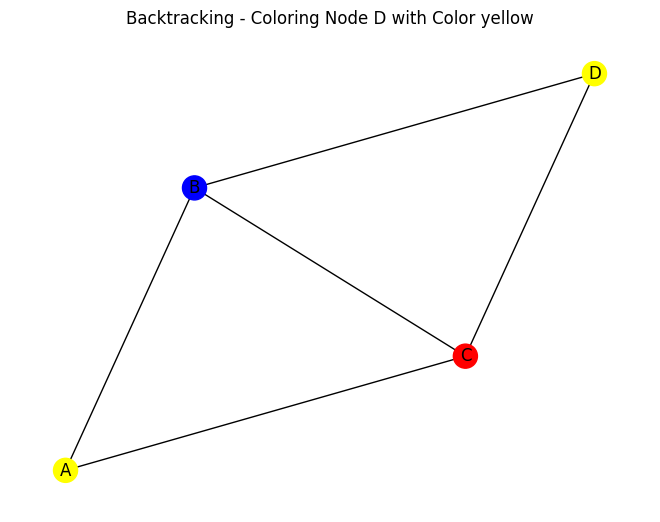

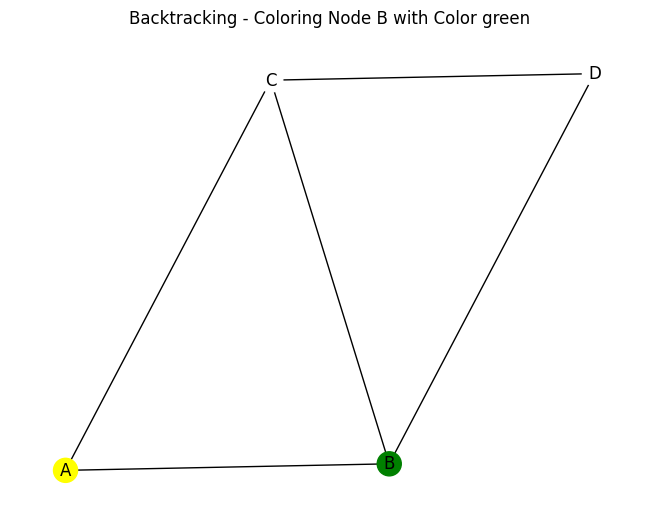

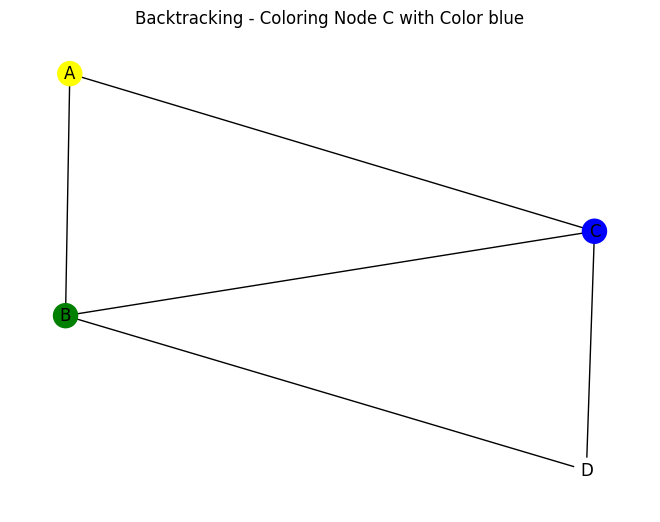

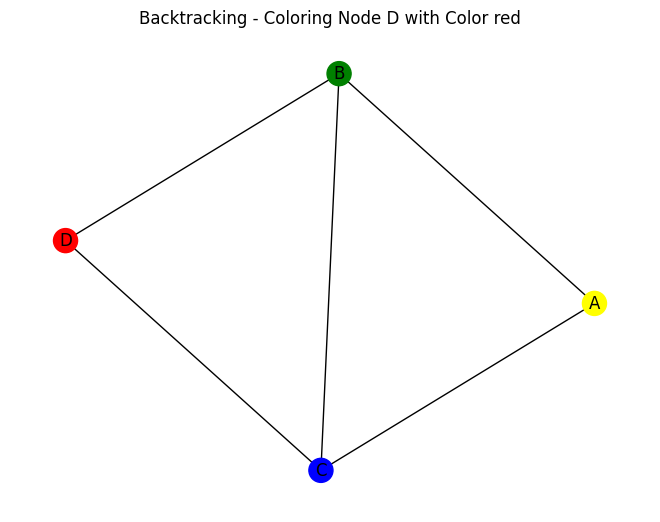

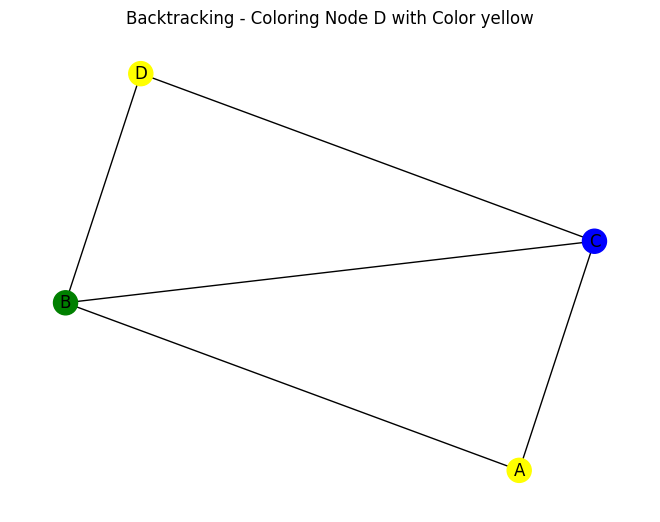

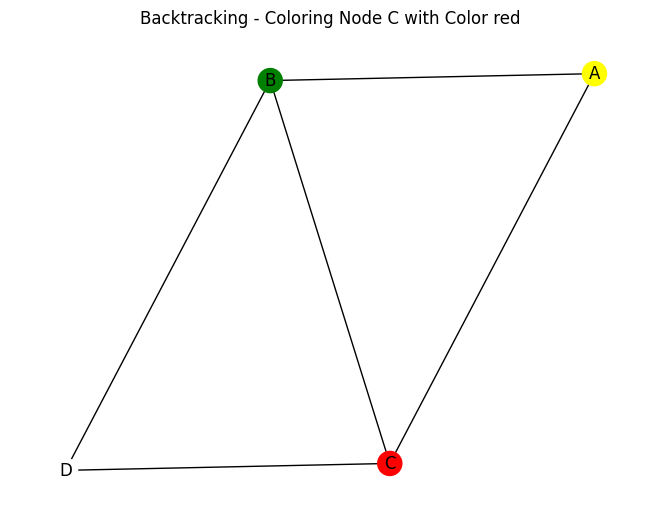

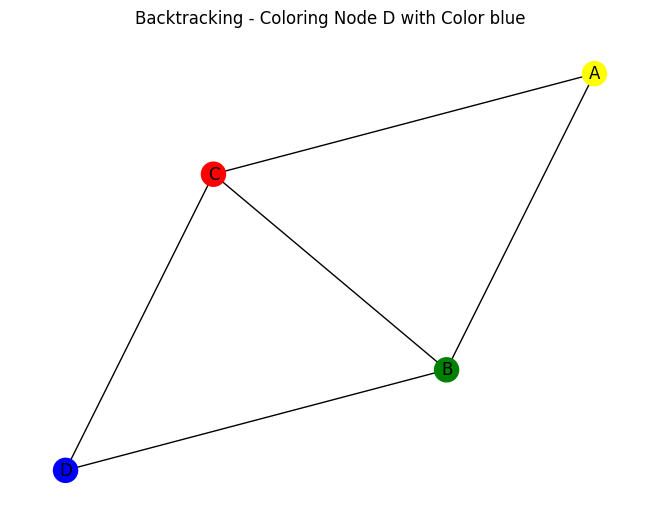

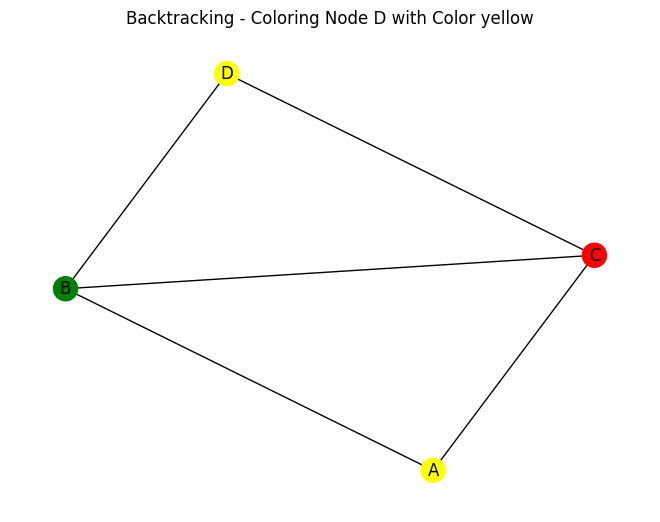

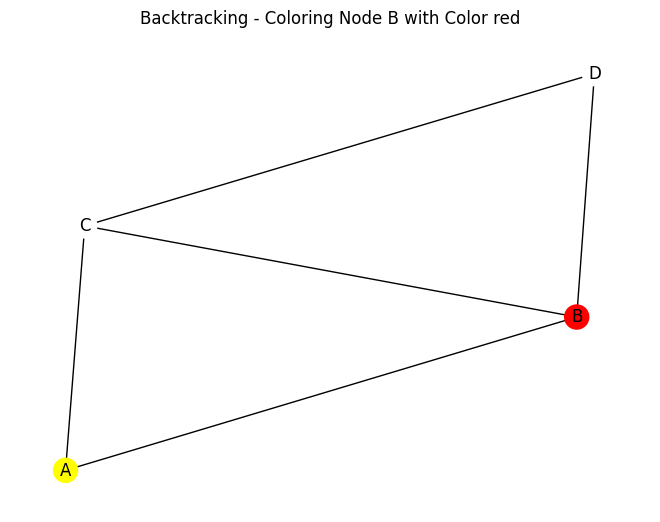

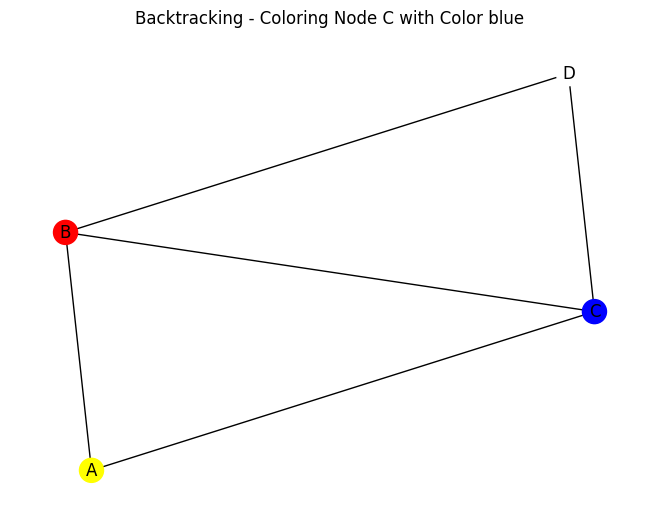

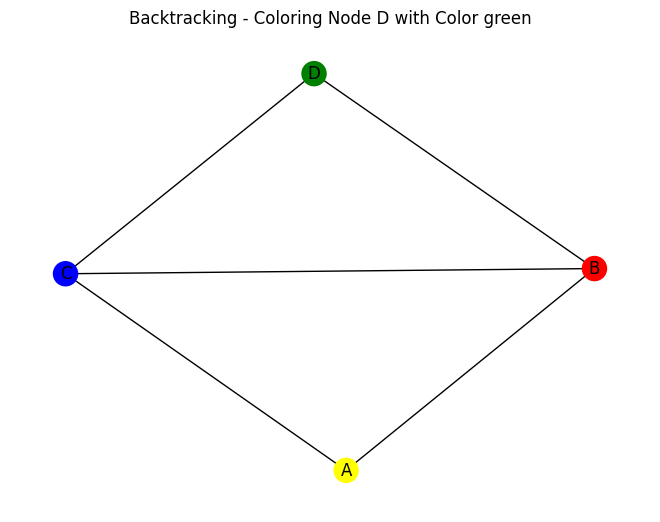

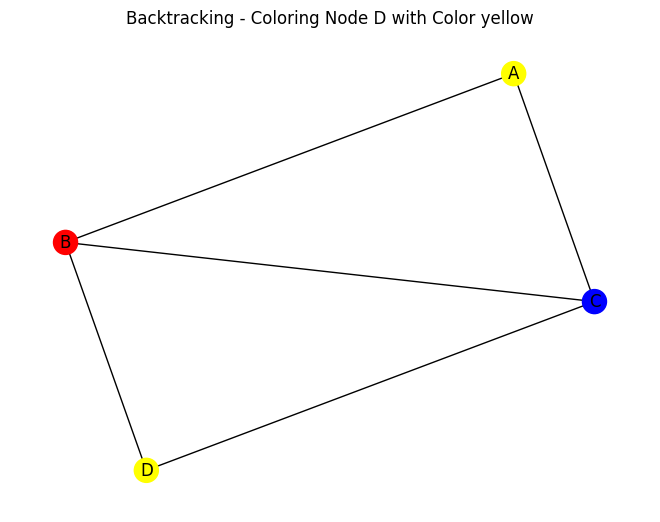

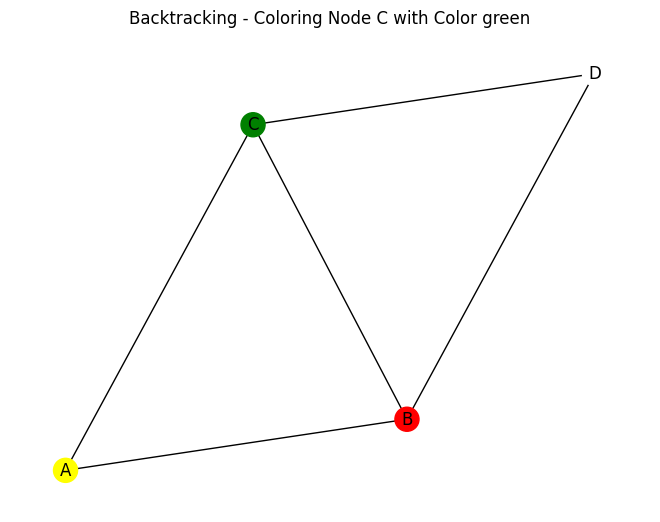

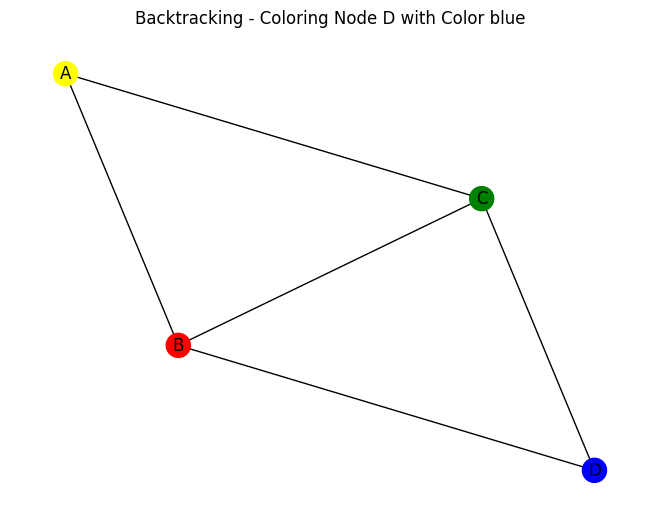

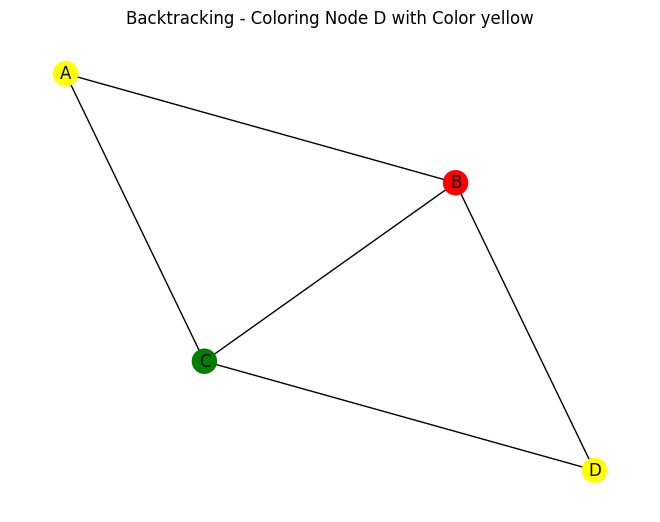

Minimum colors required: 4


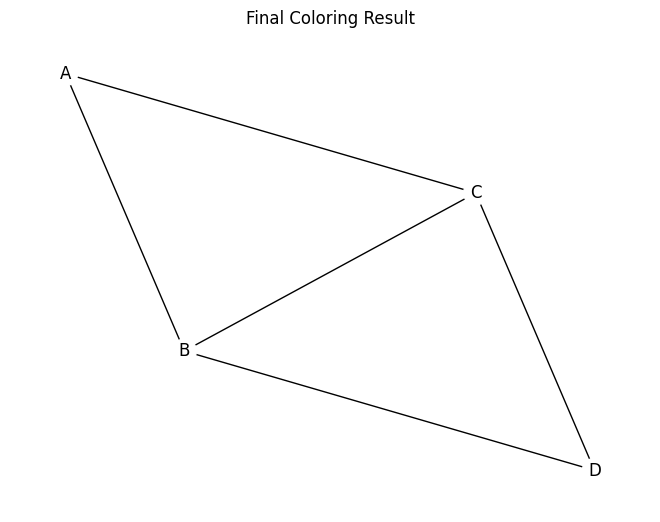

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class GraphColoringRefactored:
    def __init__(self, graph_data):
        self.graph_data = graph_data
        self.node_colors = {}
        self.min_num_colors = len(self.graph_data)

    def is_color_safe(self, node, color):
        for neighbor in self.graph_data[node]:
            if neighbor in self.node_colors and self.node_colors[neighbor] == color:
                return False
        return True

    def color_graph_util(self, node):
        if not any(node not in self.node_colors for node in self.graph_data):
            return True

        if node not in self.graph_data:
            return True

        for color in range(1, self.min_num_colors + 1):
            if self.is_color_safe(node, color):
                self.node_colors[node] = color

                # Visualize the coloring at each step of backtracking
                self.visualize_backtracking(node)

                next_node = next((n for n in self.graph_data if n not in self.node_colors), None)
                if next_node is not None and self.color_graph_util(next_node):
                    return True

                del self.node_colors[node]

        return False

    def color_graph(self):
        self.color_graph_util(next(iter(self.graph_data)))

    def visualize_graph_data(self):
        nx_graph = nx.Graph(self.graph_data)
        pos = nx.spring_layout(nx_graph)
        nx.draw(nx_graph, pos, with_labels=True, node_color='white', edge_color='black')
        plt.title('Initial Graph')
        plt.show()

    def get_color_mapping(self):
        colors = ['blue', 'green', 'red', 'yellow', 'purple', 'orange', 'pink', 'gray', 'brown', 'cyan']
        return {idx + 1: colors[idx % len(colors)] for idx in range(self.min_num_colors)}

    def visualize_backtracking(self, node):
        nx_graph = nx.Graph(self.graph_data)
        pos = nx.spring_layout(nx_graph)
        color_map = self.get_color_mapping()
        colors = [color_map.get(self.node_colors.get(n, 0), 'white') for n in nx_graph.nodes()]
        nx.draw(nx_graph, pos, with_labels=True, node_color=colors, edge_color='black')
        plt.title(f'Backtracking - Coloring Node {node} with Color {color_map.get(self.node_colors[node], "None")}')
        plt.show()

    def visualize_final_result(self):
        nx_graph = nx.Graph(self.graph_data)
        pos = nx.spring_layout(nx_graph)
        color_map = self.get_color_mapping()
        node_colors = [color_map.get(self.node_colors.get(n, 0), 'white') for n in nx_graph.nodes()]
        nx.draw(nx_graph, pos, with_labels=True, node_color=node_colors, edge_color='black')
        plt.title('Final Coloring Result')
        plt.show()

    def display_min_num_colors(self):
        print(f"Minimum colors required: {self.min_num_colors}")

# Example usage
if __name__ == "__main__":
    example_graph = {
        'A': ['B', 'C'],
        'B': ['A', 'C', 'D'],
        'C': ['A', 'B', 'D'],
        'D': ['B', 'C']
    }

    gc_refactored = GraphColoringRefactored(graph_data=example_graph)
    gc_refactored.visualize_graph_data()
    gc_refactored.color_graph()
    gc_refactored.display_min_num_colors()
    gc_refactored.visualize_final_result()


Explanation


GraphColoringRefactored Class: This class encapsulates the graph coloring algorithm and related functions.

Initialization: Upon initialization, the graph data is stored, and an empty dictionary node_colors to store the colors assigned to nodes is created. The minimum number of colors required is set to the number of nodes in the graph.

is_color_safe Method: This method checks if it's safe to assign a particular color to a node by examining its neighbors' colors.

color_graph_util Method: This is a recursive utility function to color the graph. It assigns colors to nodes one by one and checks if the color assignment is safe using the is_color_safe method.

color_graph Method: This is the main method that initiates the graph coloring process by calling the color_graph_util method for the first node in the graph.

Visualization: The class provides methods to visualize the initial graph, the backtracking steps during the coloring process, and the final colored graph using the NetworkX library and matplotlib.

display_min_num_colors Method: A method to print the minimum number of colors required to color the graph.

The example usage section demonstrates the utilization of the GraphColoringRefactored class using a sample graph and subsequently visualizes the initial graph, performs the coloring, displays the minimum required colors, and showcases the final colored graph.

